<a href="https://colab.research.google.com/github/Matheusavilap/CodigosPhyton/blob/main/C%C3%B3pia_de_Desafio_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#!pip install sidetable
#!pip install pandas-profiling==3.3.0
#!pip install ydata_profiling

import numpy as np
import pandas as pd


import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px

from sklearn import datasets
from sklearn.preprocessing import scale, minmax_scale, power_transform

from IPython.core.display import HTML
from ipywidgets import interact, widgets
import missingno as msno


In [ ]:
df = pd.read_csv('streaming_data', encoding='latin1')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
df.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [ ]:

df.dropna(subset=['CustomerID'], inplace= True)
#ETAPAS 1 e 2 completas

In [ ]:
df.isna().sum()
#SEM NULOS


InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#ETAPA 3 FILTROS
df.query('UnitPrice<=0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9302,537197,22841,ROUND CAKE TIN VINTAGE GREEN,1,12/5/2010 14:02,0.0,12647.0,Germany
33576,539263,22580,ADVENT CALENDAR GINGHAM SACK,4,12/16/2010 14:36,0.0,16560.0,United Kingdom
40089,539722,22423,REGENCY CAKESTAND 3 TIER,10,12/21/2010 13:45,0.0,14911.0,EIRE
47068,540372,22090,PAPER BUNTING RETROSPOT,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
47070,540372,22553,PLASTERS IN TIN SKULLS,24,1/6/2011 16:41,0.0,13081.0,United Kingdom
56674,541109,22168,ORGANISER WOOD ANTIQUE WHITE,1,1/13/2011 15:10,0.0,15107.0,United Kingdom
86789,543599,84535B,FAIRY CAKES NOTEBOOK A6 SIZE,16,2/10/2011 13:08,0.0,17560.0,United Kingdom
130188,547417,22062,CERAMIC BOWL WITH LOVE HEART DESIGN,36,3/23/2011 10:25,0.0,13239.0,United Kingdom
139453,548318,22055,MINI CAKE STAND HANGING STRAWBERY,5,3/30/2011 12:45,0.0,13113.0,United Kingdom
145208,548871,22162,HEART GARLAND RUSTIC PADDED,2,4/4/2011 14:42,0.0,14410.0,United Kingdom


In [ ]:
df.query('UnitPrice>0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
df.query('Quantity<=0').shape[0]

8905

In [ ]:
df.query('Quantity>0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [ ]:
#ETAPA 4
#DUPLICADOS
df.duplicated().sum().any()

True

In [ ]:
df_new = df.drop_duplicates()

In [ ]:
df_new.duplicated().sum().any()

False

In [ ]:
df_new.isna().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [ ]:
#ETAPA 05
df_new['CustomerID'] = pd.to_numeric(df_new['CustomerID'])
df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])


<ipython-input-17-959ba213f5b0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['CustomerID'] = pd.to_numeric(df_new['CustomerID'])
<ipython-input-17-959ba213f5b0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['InvoiceDate'] = pd.to_datetime(df_new['InvoiceDate'])


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB


In [ ]:
#ETAPA 06
df_new.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df_new.query('Quantity>10')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom
26,536370,22728,ALARM CLOCK BAKELIKE PINK,24,2010-12-01 08:45:00,3.75,12583.0,France
27,536370,22727,ALARM CLOCK BAKELIKE RED,24,2010-12-01 08:45:00,3.75,12583.0,France
28,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,2010-12-01 08:45:00,3.75,12583.0,France
29,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,2010-12-01 08:45:00,0.85,12583.0,France
...,...,...,...,...,...,...,...,...
541894,581587,22631,CIRCUS PARADE LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France
541895,581587,22556,PLASTERS IN TIN CIRCUS PARADE,12,2011-12-09 12:50:00,1.65,12680.0,France
541896,581587,22555,PLASTERS IN TIN STRONGMAN,12,2011-12-09 12:50:00,1.65,12680.0,France
541902,581587,22629,SPACEBOY LUNCH BOX,12,2011-12-09 12:50:00,1.95,12680.0,France


In [ ]:
df_new.query('UnitPrice>5.0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
16,536367,22622,BOX OF VINTAGE ALPHABET BLOCKS,2,2010-12-01 08:34:00,9.95,13047.0,United Kingdom
17,536367,21754,HOME BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
18,536367,21755,LOVE BUILDING BLOCK WORD,3,2010-12-01 08:34:00,5.95,13047.0,United Kingdom
19,536367,21777,RECIPE BOX WITH METAL HEART,4,2010-12-01 08:34:00,7.95,13047.0,United Kingdom
...,...,...,...,...,...,...,...,...
541855,581580,21351,CINAMMON & ORANGE WREATH,1,2011-12-09 12:20:00,6.75,12748.0,United Kingdom
541858,581580,79321,CHILLI LIGHTS,2,2011-12-09 12:20:00,5.75,12748.0,United Kingdom
541878,581585,23356,LOVE HOT WATER BOTTLE,3,2011-12-09 12:31:00,5.95,15804.0,United Kingdom
541892,581586,21217,RED RETROSPOT ROUND CAKE TINS,24,2011-12-09 12:49:00,8.95,13113.0,United Kingdom


In [ ]:
df_new = df_new[df_new['Quantity']<=10.000]

In [ ]:
df_new.query('Quantity>10')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
df_new = df_new[df_new['UnitPrice']<=5.000]

In [ ]:
df_new.query('UnitPrice>5.0')

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [ ]:
#ETAPA 7
df_new['total'] = df_new['Quantity'] * df_new['UnitPrice']

In [ ]:
df_new.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,total
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
10,536367,22745,POPPY'S PLAYHOUSE BEDROOM,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12.60
11,536367,22748,POPPY'S PLAYHOUSE KITCHEN,6,2010-12-01 08:34:00,2.10,13047.0,United Kingdom,12.60


In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225535 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    225535 non-null  object        
 1   StockCode    225535 non-null  object        
 2   Description  225535 non-null  object        
 3   Quantity     225535 non-null  int64         
 4   InvoiceDate  225535 non-null  datetime64[ns]
 5   UnitPrice    225535 non-null  float64       
 6   CustomerID   225535 non-null  float64       
 7   Country      225535 non-null  object        
 8   total        225535 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 17.2+ MB


In [ ]:
#ETAPA 8
max = df_new["InvoiceDate"].max()
print(max)

2011-12-09 12:50:00


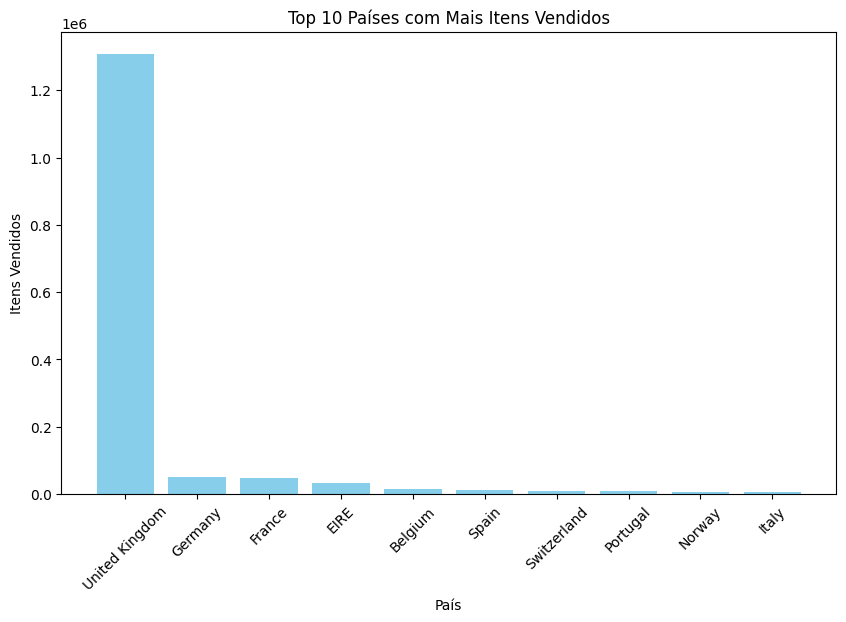

In [ ]:
#ETAPA 9 - Paises Com o Maior valor em Vendas
#Agrupando os dados por pais e somando os valores vendidos
vendas = df_new.groupby('Country')['total'].sum().reset_index()

#Ordenando os paises pelo numero de itens vendidos em ordem decrescente
top10 = vendas.sort_values(by='total', ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.bar(top10['Country'], top10['total'], color='skyblue')
plt.xlabel('País')
plt.ylabel('Itens Vendidos')
plt.title('Top 10 Países com Mais Itens Vendidos')
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

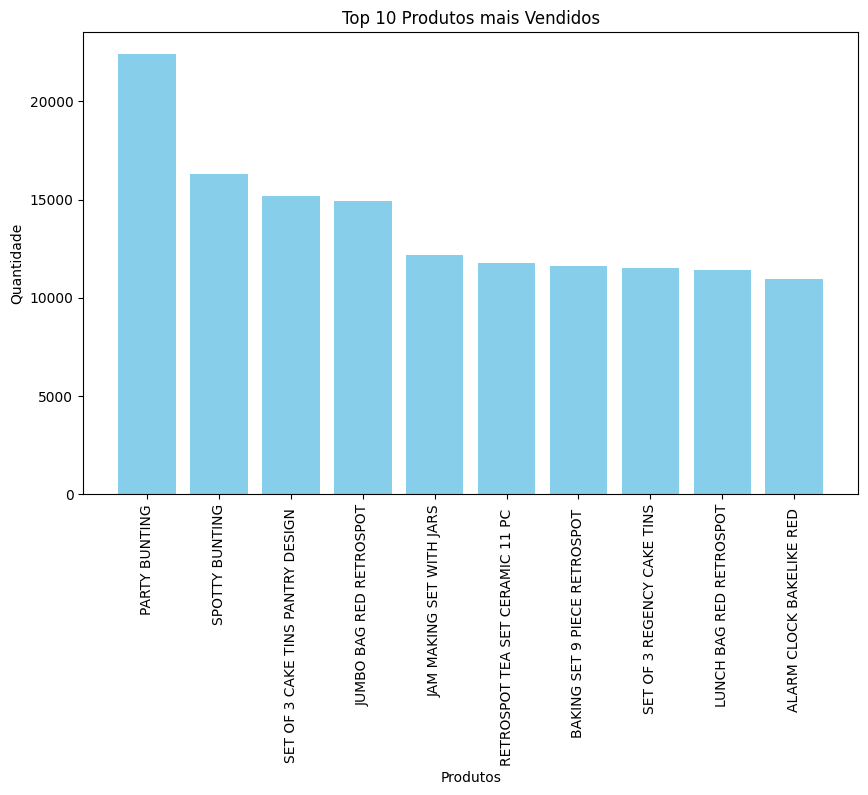

In [ ]:
#ETAPA 9 - Top 10 de produtos mais vendidos

#Agrupando os dados por Codigo e somando os valores vendidos
vendas = df_new.groupby('Description')['total'].sum().reset_index()


#Ordenando os codigos pelo numero de itens vendidos em ordem decrescente
top10 = vendas.sort_values(by='total', ascending=False).head(10)


plt.figure(figsize=(10, 6))
plt.bar(top10['Description'], top10['total'], color='skyblue')
plt.xlabel('Produtos')
plt.ylabel('Quantidade')
plt.title('Top 10 Produtos mais Vendidos')
plt.xticks(rotation=90)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()

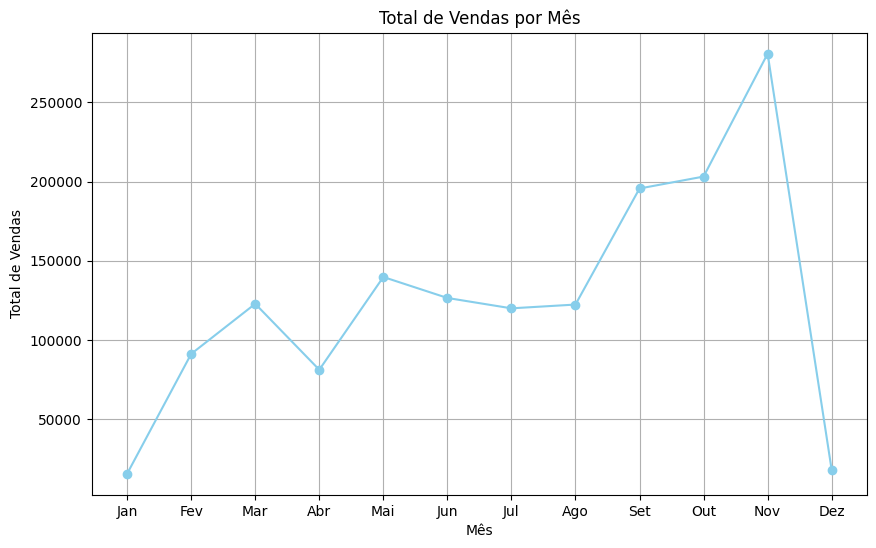

In [ ]:
#ETAPA 9 - Valor de venda total por mês
df_new['mes'] = df_new['InvoiceDate'].dt.month

vendasnomes = df_new.groupby('mes')['total'].sum()


plt.figure(figsize=(10, 6))
plt.plot(vendasnomes.index, vendasnomes.values, marker='o', color='skyblue')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Mês')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

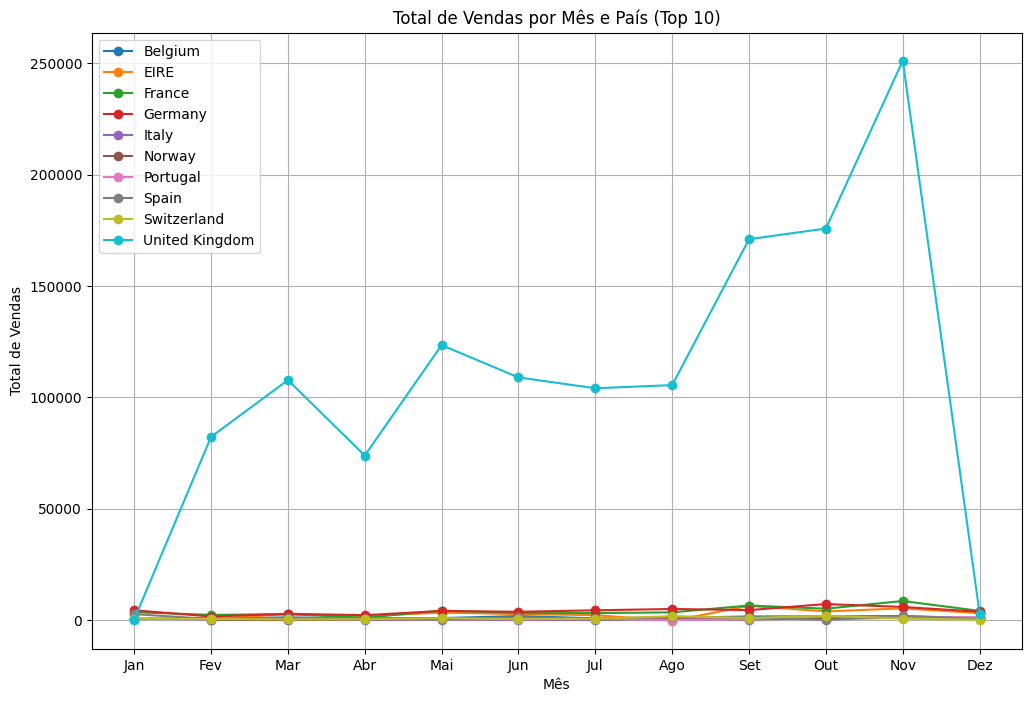

In [ ]:
#Etapa 9 - Valor de Venda total por mes e por pais

vendas_por_pais_e_mes = df_new.groupby(['Country', 'mes'])['total'].sum().reset_index()

top_10_paises = vendas_por_pais_e_mes.groupby('Country')['total'].sum().nlargest(10).index

top_10_vendas_por_pais_e_mes = vendas_por_pais_e_mes[vendas_por_pais_e_mes['Country'].isin(top_10_paises)]


plt.figure(figsize=(12, 8))
for pais in top_10_vendas_por_pais_e_mes['Country'].unique():
    dados_pais = top_10_vendas_por_pais_e_mes[top_10_vendas_por_pais_e_mes['Country'] == pais]
    plt.plot(dados_pais['mes'], dados_pais['total'], marker='o', label=pais)

plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.title('Total de Vendas por Mês e País (Top 10)')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
#Etapa 10 - Calculo do RFM

#agrupando os dados por cliente, pedido(invoiceNo) para ter a data e o preço total do pedido, depois agrupo apenas por cliente

df_new =df_new[df_new['CustomerID'] != 12346.0]
grupo = df_new.groupby(['CustomerID', 'InvoiceNo']).agg({'InvoiceDate': 'first', 'total': 'sum'})

print(grupo)



                             InvoiceDate   total
CustomerID InvoiceNo                            
12347.0    537626    2010-12-07 14:57:00  229.45
           542237    2011-01-26 14:30:00  245.50
           549222    2011-04-07 10:43:00  197.80
           556201    2011-06-09 13:01:00  168.76
           562032    2011-08-02 08:48:00  192.66
...                                  ...     ...
18283.0    578262    2011-11-23 13:27:00  307.05
           579673    2011-11-30 12:59:00  210.11
           580872    2011-12-06 12:02:00  208.00
18287.0    554065    2011-05-22 10:39:00   93.90
           570715    2011-10-12 10:23:00   44.60

[17453 rows x 2 columns]


In [ ]:
#Agrupando apenas por Cliente

grupo1 = grupo.groupby(['CustomerID']).agg({'InvoiceDate': 'first'})
print(grupo1)

                   InvoiceDate
CustomerID                    
12347.0    2010-12-07 14:57:00
12349.0    2011-11-21 09:51:00
12350.0    2011-02-02 16:01:00
12352.0    2011-02-16 12:33:00
12353.0    2011-05-19 17:47:00
...                        ...
18280.0    2011-03-07 09:52:00
18281.0    2011-06-12 10:53:00
18282.0    2011-08-05 13:35:00
18283.0    2011-01-06 14:14:00
18287.0    2011-05-22 10:39:00

[4062 rows x 1 columns]


In [ ]:
#Ultima Compra
ultima_compra = df_new.InvoiceDate.max()
print(ultima_compra)

2011-12-09 12:50:00


In [ ]:
#resumo de compra
df_customer_purchase = (
    df_new.groupby(["CustomerID","InvoiceNo"])
    .agg(
        last_purchase = ('InvoiceDate','max'),
        total_purchase = ('total','sum'),
      )
    .reset_index()
)
print(df_customer_purchase)

       CustomerID InvoiceNo       last_purchase  total_purchase
0         12347.0    537626 2010-12-07 14:57:00          229.45
1         12347.0    542237 2011-01-26 14:30:00          245.50
2         12347.0    549222 2011-04-07 10:43:00          197.80
3         12347.0    556201 2011-06-09 13:01:00          168.76
4         12347.0    562032 2011-08-02 08:48:00          192.66
...           ...       ...                 ...             ...
17448     18283.0    578262 2011-11-23 13:27:00          307.05
17449     18283.0    579673 2011-11-30 12:59:00          210.11
17450     18283.0    580872 2011-12-06 12:02:00          208.00
17451     18287.0    554065 2011-05-22 10:39:00           93.90
17452     18287.0    570715 2011-10-12 10:23:00           44.60

[17453 rows x 4 columns]


In [ ]:
#RFM

df_rfm = (
    df_customer_purchase.groupby('CustomerID')
    .agg(
        R = ('last_purchase', lambda x: (ultima_compra)),
        F = ('InvoiceNo', 'count'),
        M = ('total_purchase', 'mean')
    )
)
print(df_rfm)

                             R   F           M
CustomerID                                    
12347.0    2011-12-09 12:50:00   7  193.210000
12349.0    2011-12-09 12:50:00   1  440.940000
12350.0    2011-12-09 12:50:00   1   26.200000
12352.0    2011-12-09 12:50:00   8   51.806250
12353.0    2011-12-09 12:50:00   1   29.300000
...                        ...  ..         ...
18280.0    2011-12-09 12:50:00   1  119.150000
18281.0    2011-12-09 12:50:00   1   31.800000
18282.0    2011-12-09 12:50:00   3   31.046667
18283.0    2011-12-09 12:50:00  16  120.862500
18287.0    2011-12-09 12:50:00   2   69.250000

[4062 rows x 3 columns]
